In [1]:
import cv2
from google.colab.patches import cv2_imshow

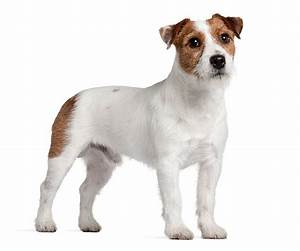

In [8]:
img_path = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/dog.jpeg'
image = cv2.imread(img_path)
cv2_imshow(image)

In [31]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 

dog = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/dog.jpeg'
cat = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/cat.jpeg'
butterfly = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/butterfly.jpeg'
elephant = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/elephant.jpeg'
squirrel = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/squirrel.jpeg' 
spider = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/spider.jpeg'
cow = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/cow.jpeg'
chicken = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/chicken.jpeg'
horse = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/horse.jpeg'
sheep = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/sheep.jpeg'

imgs = [spider, cow, chicken, squirrel]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()
        # print(preds)

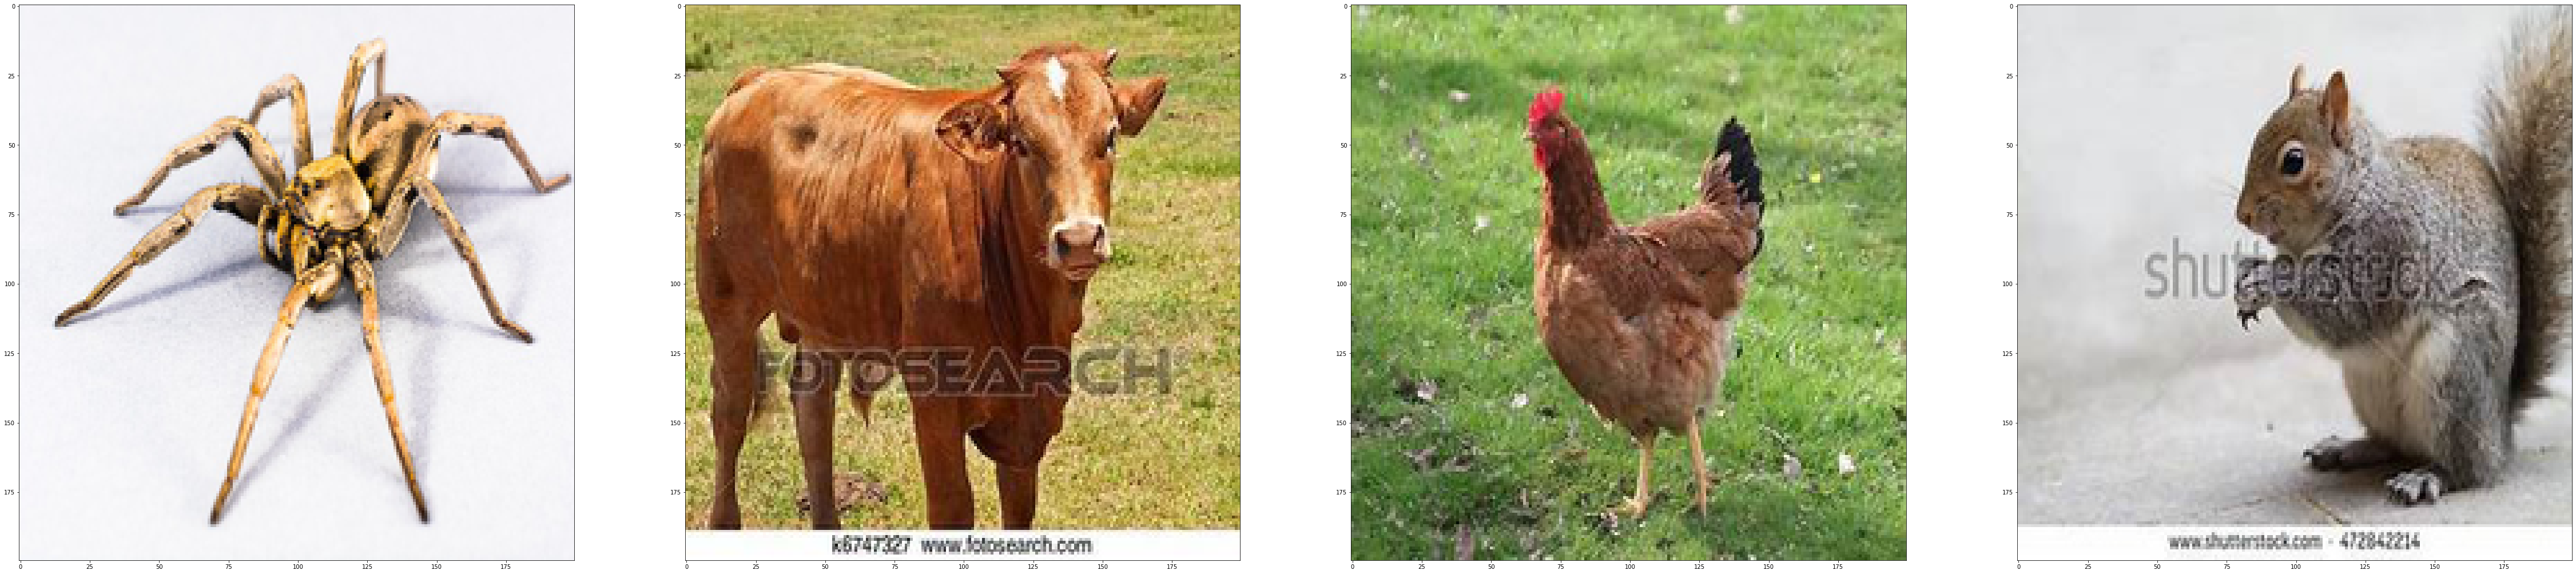

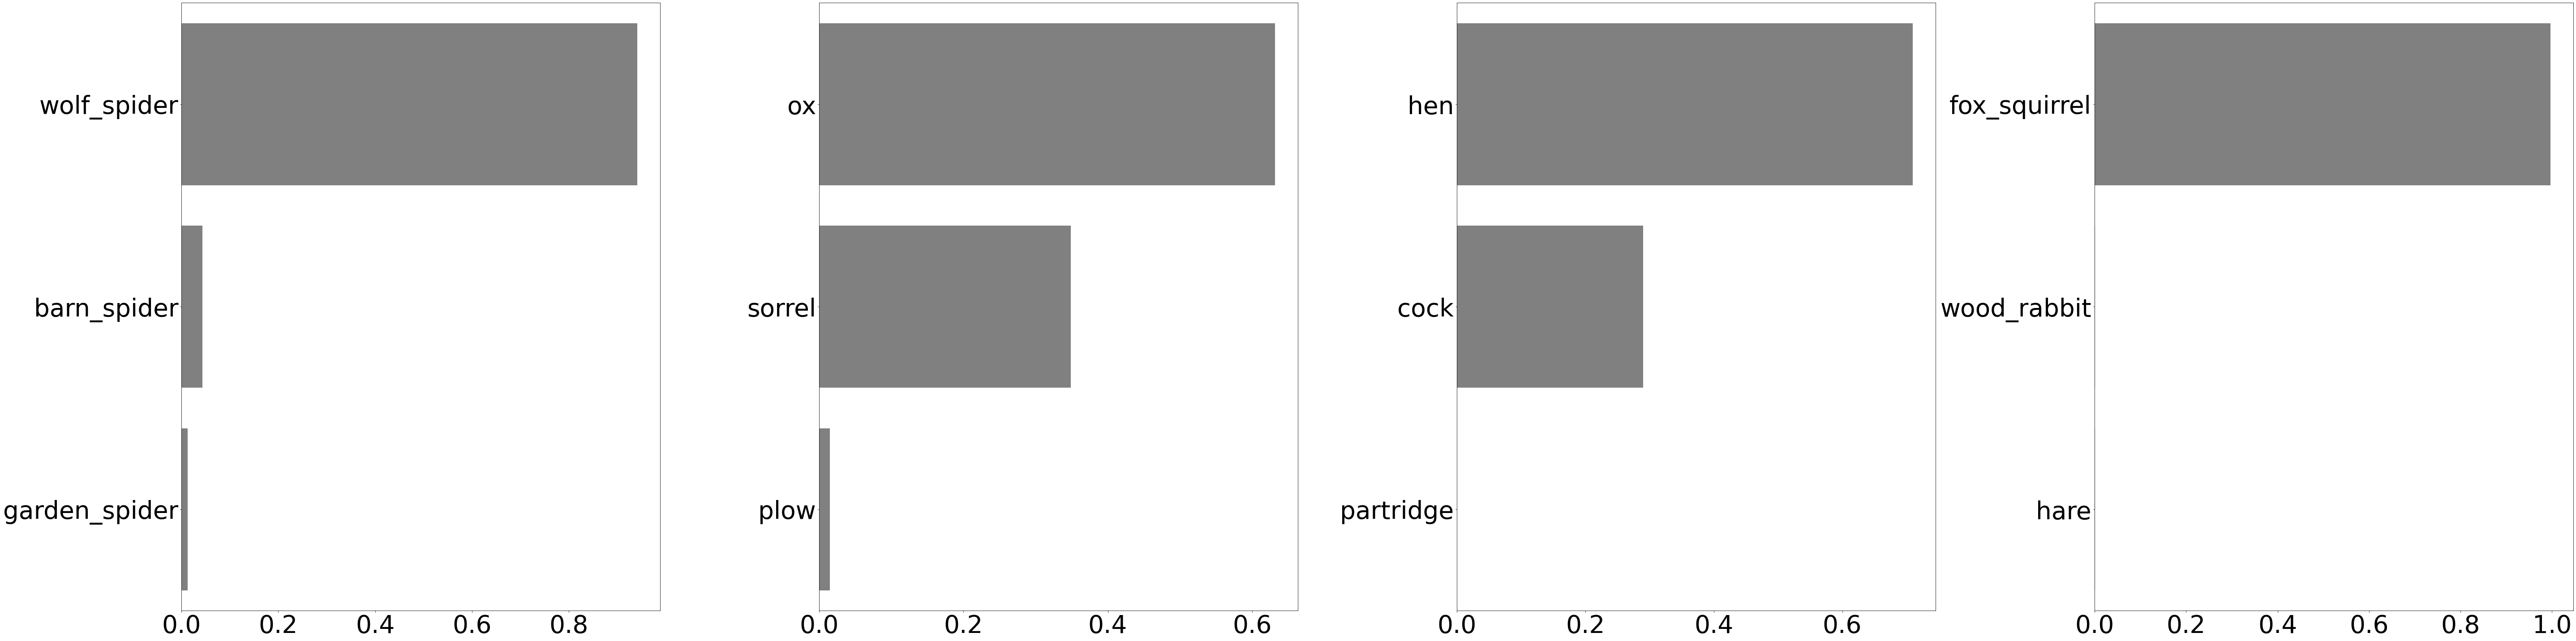

In [32]:
from keras.applications.vgg16 import VGG16
vgg16_weights = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights=vgg16_weights)
_get_predictions(vgg16_model)

In [ ]:
# from keras.applications.inception_v3 import InceptionV3
# inception_weights = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
# inception_model = InceptionV3(weights=inception_weights)
# _get_predictions(inception_model)

In [ ]:
# from keras.applications.resnet50 import ResNet50
# resnet_weights = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
# resnet_model = ResNet50(weights=resnet_weights)
# _get_predictions(resnet_model)